## Compare Heat Flux Feedback (CESM-Preindustrial Control)

Script to load in heat flux feedbacks, and visualize the differences.
Created: 12 July 2021


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr
import numpy as np
import glob
import time

import cartopy.crs as ccrs

from scipy.io import loadmat




import sys



In [5]:
# User Edits

stormtrack = 0
# Settings based on location
if stormtrack == 1:
    
    # Module Paths
    sys.path.append("/home/glliu/00_Scripts/01_Projects/00_Commons/")
    sys.path.append("/home/glliu/00_Scripts/01_Projects/01_AMV/02_stochmod/stochmod/model/")
    
    # Data Paths
    datpath = "/stormtrack/data3/glliu/01_Data/02_AMV_Project/01_hfdamping/hfdamping_PIC_SLAB/03_HFCALC/"
    lipath = "/home/glliu/01_Data/00_Scrap/landicemask_enssum.npy"
    llpath = "/home/glliu/01_Data/CESM1_LATLON.mat"
    
    # Output Paths
    figpath = "/stormtrack/data3/glliu/02_Figures/20210715/"
    
elif stormtrack == 0:
    
    # Module Paths
    sys.path.append("/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/03_Scripts/stochmod/model/")
    sys.path.append("/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/00_Commons/03_Scripts/")
    
    # Data Paths
    datpath = ""
    
from amv import proc,viz

In [6]:
# Load Slab Data
# NHFLX_Crosscorrelation_monwin3_lags123_ensorem1_lag1_pcs2_monwin3.npz.npy
# NHFLX_Damping_monwin3_lags123_ensorem1_lag1_pcs2_monwin3.npz.npy
# SST_Autocorrelation_monwin3_lags123_ensorem1_lag1_pcs2_monwin3.npz.npy
fnslab = "SLAB_PIC_nhflxdamping_monwin3_sig005_dof020_mode4_lag1.mat"

ld = loadmat(datpath+"proc/"+fnslab)
ld.keys()

dmpslab = ld['damping'] 
lon     = ld['LON1'].squeeze()
lat     = ld['LAT'].squeeze()


NameError: name 'datpath' is not defined

In [11]:
# Load Full Data
#NHFLX_Crosscorrelation_monwin3_lags123_ensorem1_lag1_pcs2_monwin3.npz.npy
#NHFLX_Damping_monwin3_lags123_ensorem1_lag1_pcs2_monwin3.npz.npy
#SST_Autocorrelation_monwin3_lags123_ensorem1_lag1_pcs2_monwin3.npz.npy
fnfull = "FULL_PIC_nhflxdamping_monwin3_sig005_dof1893_mode4.mat"

ld = loadmat(datpath+"proc/"+fnfull)
ld.keys()

dmpfull = ld['damping'] 


(<matplotlib.collections.QuadMesh at 0x7f33997bf490>,
 <matplotlib.colorbar.Colorbar at 0x7f3399772fd0>)

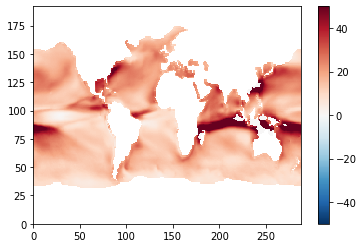

In [20]:
plt.pcolormesh(dmpslab[:,:,0].T,vmin=-50,vmax=50,cmap='RdBu_r'),plt.colorbar()

(<matplotlib.collections.QuadMesh at 0x7f3399a0cf90>,
 <matplotlib.colorbar.Colorbar at 0x7f33999e98d0>)

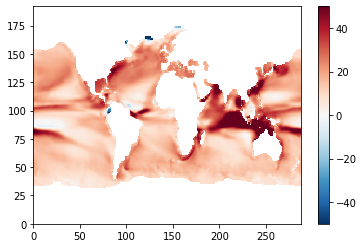

In [19]:
plt.pcolormesh(dmpfull[:,:,0].T,vmin=-50,vmax=50,cmap='RdBu_r'),plt.colorbar()

In [29]:
# Check conditions at the typical subpolar gyre point
lonf = -30
latf = 50

klon,klat = proc.find_latlon(lonf,latf,lon,lat)


Closest lon to -30.00 was -30.00
Closest lat to 50.00 was 50.42


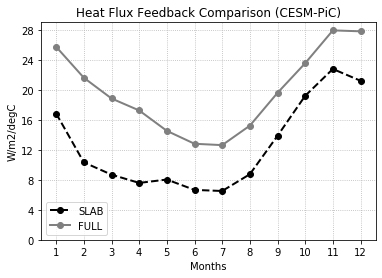

In [53]:
# Plot the results

mons = np.arange(1,13,1)

fig,ax = plt.subplots(1,1)
ax.plot(mons,dmpslab[klon,klat,:],label="SLAB",color='k',lw=2,ls='dashed',marker='o')
ax.plot(mons,dmpfull[klon,klat,:],label='FULL',color='gray',lw=2,marker="o")
ax.legend()
ax.grid(True,ls='dotted')
ax.set_xticks(mons)
ax.set_yticks(np.arange(0,32,4))
ax.set_ylabel("W/m2/degC")
ax.set_xlabel("Months")
ax.set_title("Heat Flux Feedback Comparison (CESM-PiC)")
plt.savefig("%sCESM-PIC_NHFLX-Damping_Comparison.png"%(figpath),dpi=150)

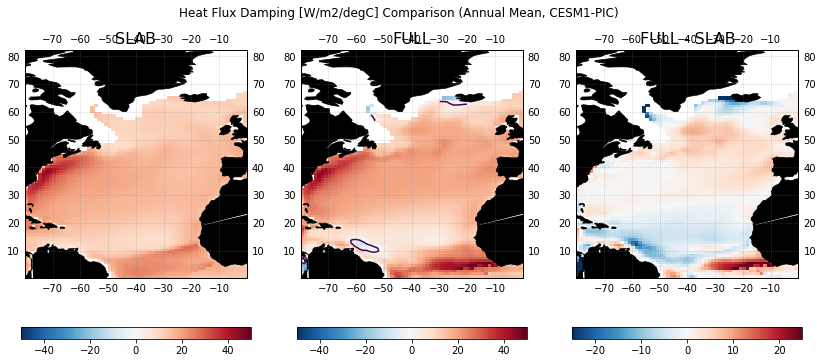

In [77]:

bbox = [-80,0,0,80]
cmap = "RdBu_r"
clim = [-50,50]

fig,axs = plt.subplots(1,3,subplot_kw={"projection": ccrs.PlateCarree()},figsize=(14,6))

ax = axs[0]
ax = viz.add_coast_grid(ax,bbox=bbox)
pcm = ax.pcolormesh(lon,lat,dmpslab.mean(2).T,vmin=clim[0],vmax=clim[-1],cmap=cmap)
ax.contour(lon,lat,dmpslab.mean(2).T,levels=[0,])
fig.colorbar(pcm,ax=ax,orientation='horizontal')
ax.set_title("SLAB",fontsize=16)

ax = axs[1]
ax = viz.add_coast_grid(ax,bbox=bbox)
pcm = ax.pcolormesh(lon,lat,dmpfull.mean(2).T,vmin=clim[0],vmax=clim[-1],cmap=cmap)
ax.contour(lon,lat,dmpfull.mean(2).T,levels=[0,])
fig.colorbar(pcm,ax=ax,orientation='horizontal')
ax.set_title("FULL",fontsize=16)

ax = axs[2]
ax = viz.add_coast_grid(ax,bbox=bbox)
pcm = ax.pcolormesh(lon,lat,dmpfull.mean(2).T-dmpslab.mean(2).T,vmin=clim[0]/2,vmax=clim[-1]/2,cmap=cmap)
fig.colorbar(pcm,ax=ax,orientation='horizontal')
ax.set_title("FULL - SLAB",fontsize=16)

plt.suptitle("Heat Flux Damping [W/m2/degC] Comparison (Annual Mean, CESM1-PIC)")
#plt.tight_layout()
plt.savefig("%sCESM-PIC_NHFLX-Damping_Comparison_AnnMean_NAtl.png"%(figpath),dpi=150)